# Introduction

This data set, compiled by scraping the public profiles of nearly sixty thousand Bay Area, CA OkCupid users in June of 2012, includes typical user information, lifestyle variables, and text responses to 10 essays questions. This data was originally collected for academic purposes by Middlebury College and Reed College. I hope to identify correlations between a user’s relationship status, user’s intentions on the dating website, and wordage used when answering the open-ended essay prompts. I am working with this data to analyze user relationship success (defined by their answer of their relationship status) and hopefully identify indicators that suggest user trustworthiness/untrustworthiness (looking specifically at user’s self-reported education, job, and income as compared to Bay Area, CA standards) as I am working with a team to make online/mobile dating safer. In my analysis, I hope to address questions such as:

•	Are there patterns of self-reported misrepresented/falsified information?
o	self-reported education, job, and income as compared to Bay Area, CA standards 
o	user height compared to California or US averages
•	To what extent are self-reported information misrepresented or exaggerated? Are there certain characteristics that are more likely to exaggerate?
o	I would like to find out if users do exaggerate variables as compared to US, CA, or SF averages.
o	I would also like to find out if certain groups (possibly defined by job, age, relationship status etc.) exaggerate more than others 
•	Which words are used most often by individuals in different relationship statuses?



In [3]:
## Notebook
from IPython.display import display,HTML
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("ticks")
sns.set_context(context="notebook",font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format='svg'

## instance data

#### Each instance consists of the following variables :

body_type

diet

drinks (alcoholic drinking habits)

drugs (drug use habits)

education

ethnicity

height (in inches)

income 

job

offspring (current or desired)

orientation (sexual)

pets

religion

sex

sign

smokes (smoking habits)

speaks (language and fluency)

status (relationship)

essay0- My self summary
essay1- What I’m doing with my life
essay2- I’m really good at
essay3- The first thing people usually notice about me
essay4- Favorite books, movies, show, music, and food
essay5- The six things I could never do without
essay6- I spend a lot of time thinking about
essay7- On a typical Friday night I am
essay8- The most private thing I am willing to admit
essay9- You should message me if...

In [23]:
d=pd.read_csv('./profiles.csv')

d.head(6)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
5,29,average,mostly anything,socially,NaN,graduated from college/university,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single


In [71]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59944 entries, 0 to 59945
Data columns (total 31 columns):
age            59944 non-null int64
body_type      54649 non-null object
diet           35550 non-null object
drinks         56961 non-null object
drugs          45865 non-null object
education      53317 non-null object
essay0         54458 non-null object
essay1         52374 non-null object
essay2         50308 non-null object
essay3         48469 non-null object
essay4         49409 non-null object
essay5         49096 non-null object
essay6         46175 non-null object
essay7         47495 non-null object
essay8         40721 non-null object
essay9         47343 non-null object
ethnicity      54266 non-null object
height         59941 non-null float64
income         59944 non-null int64
job            51747 non-null object
last_online    59944 non-null object
location       59944 non-null object
offspring      24384 non-null object
orientation    59944 non-null object
pets

In [24]:
print("The dataset contains {} instances".format(len(d)))

m=d[d["sex"]=="m"] # male users
f=d[d["sex"]=="f"] # female users
print("{} males ({:.1%}), {} females ({:.1%})".format(
    len(m),len(m)/len(d),
    len(f),len(f)/len(d)))

The dataset contains 59946 instances
35829 males (59.8%), 24117 females (40.2%)


#### Age distribution

In [28]:
print("Age statistics:\n{}".format(d["age"].describe()))

Age statistics:
count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64



In [19]:
print("There are {} users older than 70. looking at these two instances, these two users are clear outliers and most likely false accounts:")
d[d["age"]>70]

There are {} users older than 70. looking at these two instances, these two users are clear outliers and most likely false accounts:


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
2512,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"daly city, california",NaN,straight,NaN,NaN,f,NaN,NaN,english,single
25324,109,athletic,mostly other,NaN,never,working on masters program,NaN,NaN,NaN,nothing,...,"san francisco, california",might want kids,straight,NaN,other and somewhat serious about it,m,aquarius but it doesn&rsquo;t matter,when drinking,english (okay),available


In [31]:
d=d[d["age"]<=70] #remove 

print("Dataset age distribution after removing instances with age above 70".format(len(d)))

m=d[d["sex"]=="m"] # male users
f=d[d["sex"]=="f"] # female users
print("{} males ({:.1%}), {} females ({:.1%})".format(
    len(m),len(m)/len(d),
    len(f),len(f)/len(d)))

print("Age statistics:\n{}".format(d["age"].describe()))

Dataset age distribution after removing instances with age above 70
35828 males (59.8%), 24116 females (40.2%)
Age statistics:
count    59944.000000
mean        32.337715
std          9.442423
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max         69.000000
Name: age, dtype: float64


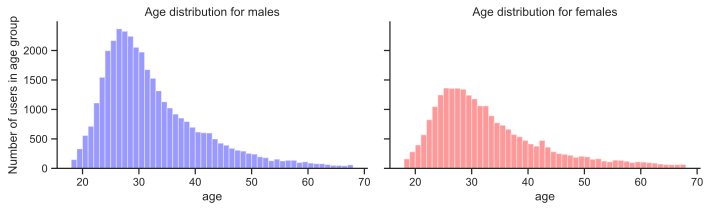

In [43]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,3),sharey=True,sharex=True)
sns.distplot(m["age"], ax=ax1,
             bins=range(d["age"].min(),d["age"].max()),
             kde=False,
             color="b")
ax1.set_title("Age distribution for males")
sns.distplot(f["age"], ax=ax2,
             bins=range(d["age"].min(),d["age"].max()),
             kde=False,
             color="r")
ax2.set_title("Age distribution for females")
ax1.set_ylabel("Number of users in age group")
for ax in (ax1,ax2):
    sns.despine(ax=ax)
fig.tight_layout()

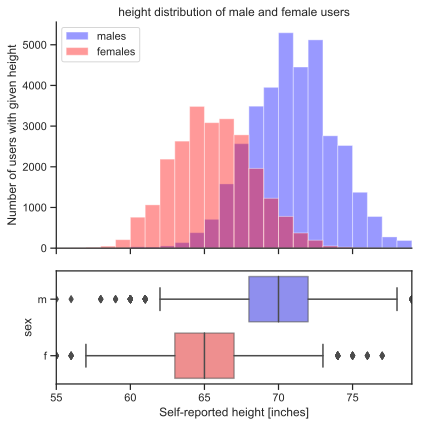

In [70]:
fig,(ax,ax2) = plt.subplots(nrows=2,sharex=True,figsize=(6,6),gridspec_kw={'height_ratios':[2,1]})

# Plot histograms of height
bins=range(55,80)
sns.distplot(m["height"].dropna(), ax=ax,
             bins=bins,
             kde=False,
             color="b",
             label="males")
sns.distplot(f["height"].dropna(), ax=ax,
             bins=bins,
             kde=False,
             color="r",
             label="females")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of users with given height")
ax.set_title("height distribution of male and female users");

# Make aligned boxplots
sns.boxplot(data=d,y="sex",x="height",orient="h",ax=ax2,palette={"m":"b","f":"r"})
plt.setp(ax2.artists, alpha=.5)
ax2.set_xlim([min(bins),max(bins)])
ax2.set_xlabel("Self-reported height [inches]")

sns.despine(ax=ax)
fig.tight_layout()


In [52]:
cdc=pd.read_csv("https://www.cdc.gov/growthcharts/data/zscore/statage.csv")

print("10 rows of cdc growth chart data")
cdc.head(11)

First 10 rows of raw cdc growth chart data


,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,24.0,0.941524,86.452201,0.040322,79.910844,80.729773,81.991714,84.102892,86.452201,88.805249,90.926191,92.196879,93.022654
1,1,24.5,1.007208,86.861609,0.040396,80.260371,81.088685,82.364010,84.494706,86.861609,89.228048,91.357530,92.631767,93.459230
2,1,25.5,0.837251,87.652473,0.040578,81.005294,81.834452,83.113871,85.258877,87.652473,90.056755,92.229661,93.534066,94.382780
3,1,26.5,0.681493,88.423264,0.040723,81.734157,82.564061,83.847162,86.005173,88.423264,90.862604,93.076082,94.408849,95.277617
4,1,27.5,0.538780,89.175492,0.040833,82.448456,83.278986,84.565344,86.735069,89.175492,91.647114,93.898271,95.257541,96.145118
5,1,28.5,0.407697,89.910409,0.040909,83.149450,83.980453,85.269620,87.449772,89.910409,92.411590,94.697570,96.081488,96.986625
6,1,29.5,0.286762,90.629078,0.040952,83.838194,84.669484,85.960983,88.150284,90.629078,93.157190,95.475221,96.881980,97.803453
7,1,30.5,0.174489,91.332424,0.040965,84.515583,85.346943,86.640272,88.837454,91.332424,93.884956,96.232394,97.660267,98.596905
8,1,31.5,0.069445,92.021272,0.040950,85.182380,86.013566,87.308201,89.512019,92.021272,94.595854,96.970215,98.417579,99.368283
9,1,32.5,-0.029721,92.696379,0.040909,85.839250,86.669993,87.965401,90.174637,92.696379,95.290799,97.689781,99.155138,100.118893


In [62]:
cdc["Age"]=cdc["Agemos"]/12
cdc["Sex"]=cdc["Sex"].replace({1:"m",2:"f"}) 
percentiles=[3,5,10,25,50,75,90,95,97]
percentile_columns=["P"+str(p) for p in percentiles] 
cdc[percentile_columns]=cdc[percentile_columns]*0.393701 
cdc20=cdc[cdc["Age"]==20].set_index("Sex") 

print("Height Percentiles for 20-year-old US population [inches]")
cdc20.head()


Height Percentiles for 20-year-old US population [inches]


,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97,Age
Sex,,,,,,,,,,,,,,
m,240.0,1.167279,176.849232,0.040370,1.544925,1.561057,1.585843,1.627116,1.672768,1.718213,1.758944,1.783244,1.798996,20.0
f,240.0,1.108046,163.338251,0.039636,1.429319,1.443881,1.466273,1.503608,1.544972,1.586216,1.623239,1.645352,1.659695,20.0
